<a href="https://colab.research.google.com/github/hersan19/EMC_2021/blob/main/Ejemplo_RNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/hersan19/EMC_2021/main/iris.csv?token=AMUQEUWSUXMCPRPCNTD3BD3BCOHUS")
df.sample(25)

,sepal_length,sepal_width,petal_length,petal_width,species
113,5.7,2.5,5.0,2.0,virginica
59,5.2,2.7,3.9,1.4,versicolor
21,5.1,3.7,1.5,0.4,setosa
89,5.5,2.5,4.0,1.3,versicolor
141,6.9,3.1,5.1,2.3,virginica
111,6.4,2.7,5.3,1.9,virginica
41,4.5,2.3,1.3,0.3,setosa
126,6.2,2.8,4.8,1.8,virginica
107,7.3,2.9,6.3,1.8,virginica
34,4.9,3.1,1.5,0.2,setosa


In [3]:
mappings = {"setosa": 0,"versicolor": 1,"virginica": 2}
df["species"] = df["species"].apply(lambda x: mappings[x])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


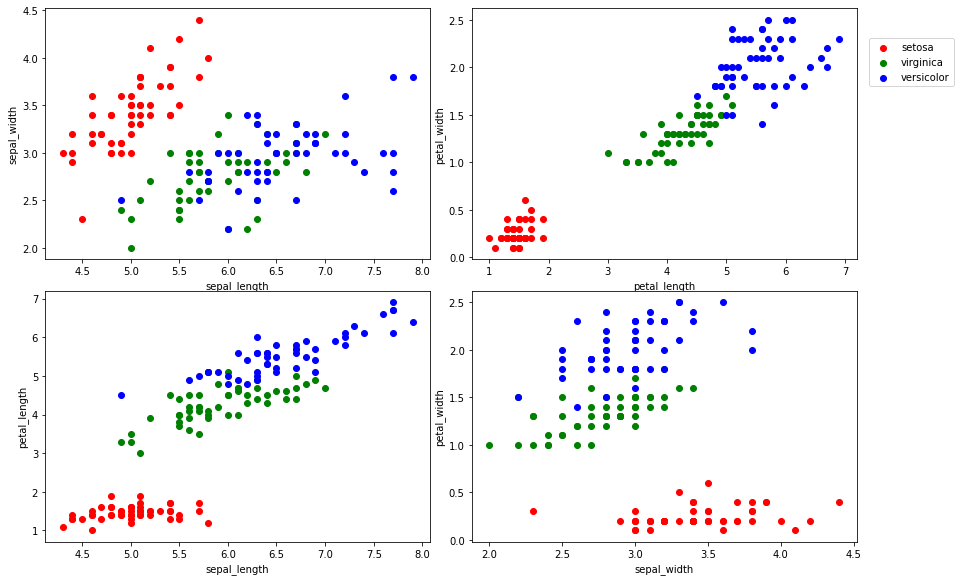

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ["r", "g", "b"]
labels = ["setosa","virginica","versicolor"]

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df["species"]==j][x], df[df["species"]==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [5]:
X = df.drop("species",axis=1).values
y = df["species"].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [6]:
class Red_neuronal(nn.Module):
  def __init__(self,tam_entrada,tam_oculta1,tam_oculta2,tam_salida):
    super(Red_neuronal, self).__init__()
    self.fc1 = nn.Linear(tam_entrada,tam_oculta1)                  
    self.fc2 = nn.Linear(tam_oculta1, tam_oculta2)                  
    self.out = nn.Linear(tam_oculta2, tam_salida)      
        
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x



In [7]:
red=Red_neuronal(4,10,9,3)
print(red)

Red_neuronal(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)


In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(red.parameters(), lr=0.01)

In [9]:
epochs = 100
losses = []

for i in range(epochs):
    y_pred = red.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    print(f'Epoca: {i:2}  loss: {loss.item():10.8f}')
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoca:  0  loss: 1.26095462
Epoca:  1  loss: 1.18267894
Epoca:  2  loss: 1.12573671
Epoca:  3  loss: 1.08701372
Epoca:  4  loss: 1.06213903
Epoca:  5  loss: 1.04594827
Epoca:  6  loss: 1.03856552
Epoca:  7  loss: 1.03063548
Epoca:  8  loss: 1.01962507
Epoca:  9  loss: 1.00505340
Epoca: 10  loss: 0.98683298
Epoca: 11  loss: 0.96504575
Epoca: 12  loss: 0.93996918
Epoca: 13  loss: 0.91277736
Epoca: 14  loss: 0.88547039
Epoca: 15  loss: 0.85623759
Epoca: 16  loss: 0.82703626
Epoca: 17  loss: 0.79855192
Epoca: 18  loss: 0.76942122
Epoca: 19  loss: 0.74015915
Epoca: 20  loss: 0.70938599
Epoca: 21  loss: 0.67735499
Epoca: 22  loss: 0.64612502
Epoca: 23  loss: 0.61716294
Epoca: 24  loss: 0.59017640
Epoca: 25  loss: 0.56370538
Epoca: 26  loss: 0.53696150
Epoca: 27  loss: 0.51054794
Epoca: 28  loss: 0.48568228
Epoca: 29  loss: 0.46339357
Epoca: 30  loss: 0.44376010
Epoca: 31  loss: 0.42608353
Epoca: 32  loss: 0.40932429
Epoca: 33  loss: 0.39301553
Epoca: 34  loss: 0.37765563
Epoca: 35  loss: 0.3

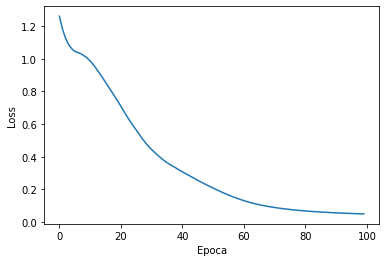

In [10]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoca');

In [11]:
predicciones = []
with torch.no_grad():
    for val in X_test:
        res = red.forward(val)
        predicciones.append(res.argmax().item())

In [13]:
df = pd.DataFrame({'Prueba': y_test, 'Resultado': predicciones})
df['Correcto'] = ["Si" if corr == predicciones else "No" for corr, predicciones in zip(df['Prueba'], df['Resultado'])]
df

,Prueba,Resultado,Correcto
0,2,2,Si
1,1,1,Si
2,2,2,Si
3,1,1,Si
4,1,1,Si
5,1,1,Si
6,0,0,Si
7,2,2,Si
8,0,0,Si
9,2,2,Si
